# Spatial Weights


Spatial weights are mathematical structures used to represent spatial relationships. Many spatial analytics, such as spatial autocorrelation statistics and regionalization algorithms rely on spatial weights. Generally speaking, a spatial weight $w_{i,j}$ expresses the notion of a geographical relationship between locations $i$ and $j$. These relationships can be based on a number of criteria including contiguity, geospatial distance and general distances.

PySAL offers functionality for the construction, manipulation, analysis, and conversion of a wide array of spatial weights.

We begin with construction of weights from common spatial data formats.


In [3]:
import pysal as ps
import numpy as np

There are functions to construct weights directly from a file path. 

In [4]:
shp_path = "data/texas.shp"

## Weight Types

### Contiguity: 
#### Queen Weights

A commonly-used type of weight is a queen contigutiy weight, which reflects adjacency relationships as a binary indicator variable denoting whether or not a polygon shares an edge or a vertex with another polygon. These weights are symmetric, in that when polygon $A$ neighbors polygon $B$, both $w_{AB} = 1$ and $w_{BA} = 1$.

To construct queen weights from a shapefile, use the `queen_from_shapefile` function:

In [5]:
qW = ps.queen_from_shapefile(shp_path)
dataframe = ps.pdio.read_files(shp_path)

In [6]:
qW

All weights objects have a few traits that you can use to work with the weights object, as well as to get information about the weights object. 

To get the neighbors & weights around an observation, use the observation's index on the weights object, like a dictionary:

In [7]:
qW[4] #neighbors & weights of the 5th observation (0-index remember)

{0: 1.0, 3: 1.0, 5: 1.0, 6: 1.0, 7: 1.0}

By default, the weights and the pandas dataframe will use the same index. So, we can view the observation and its neighbors in the dataframe by putting the observation's index and its neighbors' indexes together in one list:

In [8]:
self_and_neighbors = [4]
self_and_neighbors.extend(qW.neighbors[4])
print(self_and_neighbors)

[4, 0, 3, 5, 6, 7]


and grabbing those elements from the dataframe:

In [9]:
dataframe.loc[self_and_neighbors]

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,FIPSNO,SOUTH,HR60,...,BLK90,GI59,GI69,GI79,GI89,FH60,FH70,FH80,FH90,geometry
4,Ochiltree,Texas,48,357,48357,48,357,48357,1,0.000000,...,0.021911,0.236998,0.352940,0.343949,0.374461,5.172414,4.0,4.758392,9.159159,<pysal.cg.shapes.Polygon object at 0x10f14fb50>
0,Lipscomb,Texas,48,295,48295,48,295,48295,1,0.000000,...,0.031817,0.286929,0.378219,0.407005,0.373005,6.724512,4.5,3.835360,6.093580,<pysal.cg.shapes.Polygon object at 0x10f14fa50>
3,Hansford,Texas,48,195,48195,48,195,48195,1,0.000000,...,0.000000,0.253527,0.357813,0.393938,0.383924,7.591786,4.7,5.542986,7.125457,<pysal.cg.shapes.Polygon object at 0x10f14fad0>
5,Roberts,Texas,48,393,48393,48,393,48393,1,0.000000,...,0.000000,0.320275,0.318656,0.398681,0.339626,5.762712,5.3,6.231454,4.885993,<pysal.cg.shapes.Polygon object at 0x10f14fcd0>
6,Hemphill,Texas,48,211,48211,48,211,48211,1,0.000000,...,0.188172,0.286707,0.385605,0.352996,0.346318,6.300115,6.9,6.451613,6.330366,<pysal.cg.shapes.Polygon object at 0x10f14fd50>
7,Hutchinson,Texas,48,233,48233,48,233,48233,1,1.936915,...,2.635369,0.199287,0.322579,0.323864,0.370207,5.387316,5.1,6.222679,8.484271,<pysal.cg.shapes.Polygon object at 0x10f14fdd0>


A full, dense matrix describing all of the pairwise relationships is constructed using the `.full` method, or when `pysal.full` is called on a weights object:

In [10]:
Wmatrix, ids = qW.full()
#Wmatrix, ids = ps.full(qW)

In [11]:
Wmatrix

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  1.,  1.],
       [ 0.,  0.,  0., ...,  1.,  0.,  1.],
       [ 0.,  0.,  0., ...,  1.,  1.,  0.]])

In [12]:
n_neighbors = Wmatrix.sum(axis=1) # how many neighbors each region has

In [13]:
n_neighbors[4]

5.0

In [14]:
qW.cardinalities[4]

5

Note that this matrix is binary, in that its elements are either zero or one, since an observation is either a neighbor or it is not a neighbor. 

However, many common use cases of spatial weights require that the matrix is row-standardized. This is done simply in PySAL using the `.transform` attribute

In [15]:
qW.transform = 'r'

Now, if we build a new full matrix, its rows should sum to one:

In [16]:
Wmatrix, ids = qW.full()

In [17]:
Wmatrix.sum(axis=1) #numpy axes are 0:column, 1:row, 2:facet, into higher dimensions

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

Since weight matrices are typically very sparse, there is also a sparse weights matrix constructor:

In [18]:
qW.sparse

<254x254 sparse matrix of type '<type 'numpy.float64'>'
	with 1460 stored elements in Compressed Sparse Row format>

In [19]:
qW.pct_nonzero #Percentage of nonzero neighbor counts

2.263004526009052

By default, PySAL assigns each observation an index according to the order in which the observation was read in. This means that, by default, all of the observations in the weights object are indexed by table order. If you have an alternative ID variable, you can pass that into the weights constructor. 

For example, the `texas.shp` dataset has a possible alternative ID Variable, a `FIPS` code.

In [20]:
dataframe.head()

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,FIPSNO,SOUTH,HR60,...,BLK90,GI59,GI69,GI79,GI89,FH60,FH70,FH80,FH90,geometry
0,Lipscomb,Texas,48,295,48295,48,295,48295,1,0.0,...,0.031817,0.286929,0.378219,0.407005,0.373005,6.724512,4.5,3.835360,6.093580,<pysal.cg.shapes.Polygon object at 0x10f14fa50>
1,Sherman,Texas,48,421,48421,48,421,48421,1,0.0,...,0.139958,0.288976,0.359377,0.415453,0.378041,5.665722,1.7,3.253796,3.869407,<pysal.cg.shapes.Polygon object at 0x10f14fa90>
2,Dallam,Texas,48,111,48111,48,111,48111,1,0.0,...,2.050906,0.331667,0.385996,0.370037,0.376015,7.546049,7.2,9.471366,14.231738,<pysal.cg.shapes.Polygon object at 0x10f14fc10>
3,Hansford,Texas,48,195,48195,48,195,48195,1,0.0,...,0.000000,0.253527,0.357813,0.393938,0.383924,7.591786,4.7,5.542986,7.125457,<pysal.cg.shapes.Polygon object at 0x10f14fad0>
4,Ochiltree,Texas,48,357,48357,48,357,48357,1,0.0,...,0.021911,0.236998,0.352940,0.343949,0.374461,5.172414,4.0,4.758392,9.159159,<pysal.cg.shapes.Polygon object at 0x10f14fb50>


The observation we were discussing above is in the fifth row: Ochiltree county, Texas. Note that its FIPS code is 48357.

Then, instead of indexing the weights and the dataframe just based on read-order, use the `FIPS` code as an index:

In [21]:
qW = ps.queen_from_shapefile(shp_path, idVariable='FIPS')

In [22]:
qW[4] #fails, since no FIPS is 4. 

KeyError: 4

Note that a `KeyError` in Python usually means that some index, here `4`, was not found in the collection being searched, the IDs in the queen weights object. This makes sense, since we explicitly passed an `idVariable` argument, and nothing has a `FIPS` code of 4.

Instead, if we use the observation's `FIPS` code:

In [23]:
qW['48357']

{u'48195': 1.0, u'48211': 1.0, u'48233': 1.0, u'48295': 1.0, u'48393': 1.0}

We get what we need.

In addition, we have to now query the dataframe using the `FIPS` code to find our neighbors. But, this is relatively easy to do, since pandas will parse the query by looking into python objects, if told to. 

First, let us store the neighbors of our target county:

In [24]:
self_and_neighbors = ['48357']
self_and_neighbors.extend(qW.neighbors['48357'])

Then, we can use this list in `.query`: 

In [25]:
dataframe.query('FIPS in @self_and_neighbors')

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,FIPSNO,SOUTH,HR60,...,BLK90,GI59,GI69,GI79,GI89,FH60,FH70,FH80,FH90,geometry
0,Lipscomb,Texas,48,295,48295,48,295,48295,1,0.000000,...,0.031817,0.286929,0.378219,0.407005,0.373005,6.724512,4.5,3.835360,6.093580,<pysal.cg.shapes.Polygon object at 0x10f14fa50>
3,Hansford,Texas,48,195,48195,48,195,48195,1,0.000000,...,0.000000,0.253527,0.357813,0.393938,0.383924,7.591786,4.7,5.542986,7.125457,<pysal.cg.shapes.Polygon object at 0x10f14fad0>
4,Ochiltree,Texas,48,357,48357,48,357,48357,1,0.000000,...,0.021911,0.236998,0.352940,0.343949,0.374461,5.172414,4.0,4.758392,9.159159,<pysal.cg.shapes.Polygon object at 0x10f14fb50>
5,Roberts,Texas,48,393,48393,48,393,48393,1,0.000000,...,0.000000,0.320275,0.318656,0.398681,0.339626,5.762712,5.3,6.231454,4.885993,<pysal.cg.shapes.Polygon object at 0x10f14fcd0>
6,Hemphill,Texas,48,211,48211,48,211,48211,1,0.000000,...,0.188172,0.286707,0.385605,0.352996,0.346318,6.300115,6.9,6.451613,6.330366,<pysal.cg.shapes.Polygon object at 0x10f14fd50>
7,Hutchinson,Texas,48,233,48233,48,233,48233,1,1.936915,...,2.635369,0.199287,0.322579,0.323864,0.370207,5.387316,5.1,6.222679,8.484271,<pysal.cg.shapes.Polygon object at 0x10f14fdd0>


Note that we have to use `@` before the name in order to show that we're referring to a python object and not a column in the dataframe. 

In [26]:
#dataframe.query('FIPS in self_and_neighbors') will fail because there is no column called 'self_and_neighbors'

Of course, we could also reindex the dataframe to use the same index as our weights:

In [27]:
fips_frame = dataframe.set_index(dataframe.FIPS)
fips_frame.head()

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,FIPSNO,SOUTH,HR60,...,BLK90,GI59,GI69,GI79,GI89,FH60,FH70,FH80,FH90,geometry
FIPS,,,,,,,,,,,,,,,,,,,,,
48295,Lipscomb,Texas,48,295,48295,48,295,48295,1,0.0,...,0.031817,0.286929,0.378219,0.407005,0.373005,6.724512,4.5,3.835360,6.093580,<pysal.cg.shapes.Polygon object at 0x10f14fa50>
48421,Sherman,Texas,48,421,48421,48,421,48421,1,0.0,...,0.139958,0.288976,0.359377,0.415453,0.378041,5.665722,1.7,3.253796,3.869407,<pysal.cg.shapes.Polygon object at 0x10f14fa90>
48111,Dallam,Texas,48,111,48111,48,111,48111,1,0.0,...,2.050906,0.331667,0.385996,0.370037,0.376015,7.546049,7.2,9.471366,14.231738,<pysal.cg.shapes.Polygon object at 0x10f14fc10>
48195,Hansford,Texas,48,195,48195,48,195,48195,1,0.0,...,0.000000,0.253527,0.357813,0.393938,0.383924,7.591786,4.7,5.542986,7.125457,<pysal.cg.shapes.Polygon object at 0x10f14fad0>
48357,Ochiltree,Texas,48,357,48357,48,357,48357,1,0.0,...,0.021911,0.236998,0.352940,0.343949,0.374461,5.172414,4.0,4.758392,9.159159,<pysal.cg.shapes.Polygon object at 0x10f14fb50>


Now that both are using the same weights, we can use the `.loc` indexer again:

In [28]:
fips_frame.loc[self_and_neighbors]

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,FIPSNO,SOUTH,HR60,...,BLK90,GI59,GI69,GI79,GI89,FH60,FH70,FH80,FH90,geometry
FIPS,,,,,,,,,,,,,,,,,,,,,
48357,Ochiltree,Texas,48,357,48357,48,357,48357,1,0.000000,...,0.021911,0.236998,0.352940,0.343949,0.374461,5.172414,4.0,4.758392,9.159159,<pysal.cg.shapes.Polygon object at 0x10f14fb50>
48295,Lipscomb,Texas,48,295,48295,48,295,48295,1,0.000000,...,0.031817,0.286929,0.378219,0.407005,0.373005,6.724512,4.5,3.835360,6.093580,<pysal.cg.shapes.Polygon object at 0x10f14fa50>
48195,Hansford,Texas,48,195,48195,48,195,48195,1,0.000000,...,0.000000,0.253527,0.357813,0.393938,0.383924,7.591786,4.7,5.542986,7.125457,<pysal.cg.shapes.Polygon object at 0x10f14fad0>
48393,Roberts,Texas,48,393,48393,48,393,48393,1,0.000000,...,0.000000,0.320275,0.318656,0.398681,0.339626,5.762712,5.3,6.231454,4.885993,<pysal.cg.shapes.Polygon object at 0x10f14fcd0>
48211,Hemphill,Texas,48,211,48211,48,211,48211,1,0.000000,...,0.188172,0.286707,0.385605,0.352996,0.346318,6.300115,6.9,6.451613,6.330366,<pysal.cg.shapes.Polygon object at 0x10f14fd50>
48233,Hutchinson,Texas,48,233,48233,48,233,48233,1,1.936915,...,2.635369,0.199287,0.322579,0.323864,0.370207,5.387316,5.1,6.222679,8.484271,<pysal.cg.shapes.Polygon object at 0x10f14fdd0>


#### Rook Weights

Rook weights are another type of contiguity weight, but consider observations as neighboring only when they share an edge. The rook neighbors of an observation may be different than its queen neighbors, depending on how the observation and its nearby polygons are configured. 

We can construct this in the same way as the queen weights, using the special `rook_from_shapefile` function:

In [29]:
rW = ps.rook_from_shapefile(shp_path, idVariable='FIPS')

In [30]:
rW['48357']

{u'48195': 1.0, u'48295': 1.0, u'48393': 1.0}

These weights function exactly like the Queen weights, and are only distinguished by what they consider "neighbors."

In [31]:
self_and_neighbors = ['48357']
self_and_neighbors.extend(rW.neighbors['48357'])
fips_frame.loc[self_and_neighbors]

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,FIPSNO,SOUTH,HR60,...,BLK90,GI59,GI69,GI79,GI89,FH60,FH70,FH80,FH90,geometry
FIPS,,,,,,,,,,,,,,,,,,,,,
48357,Ochiltree,Texas,48,357,48357,48,357,48357,1,0.0,...,0.021911,0.236998,0.352940,0.343949,0.374461,5.172414,4.0,4.758392,9.159159,<pysal.cg.shapes.Polygon object at 0x10f14fb50>
48295,Lipscomb,Texas,48,295,48295,48,295,48295,1,0.0,...,0.031817,0.286929,0.378219,0.407005,0.373005,6.724512,4.5,3.835360,6.093580,<pysal.cg.shapes.Polygon object at 0x10f14fa50>
48195,Hansford,Texas,48,195,48195,48,195,48195,1,0.0,...,0.000000,0.253527,0.357813,0.393938,0.383924,7.591786,4.7,5.542986,7.125457,<pysal.cg.shapes.Polygon object at 0x10f14fad0>
48393,Roberts,Texas,48,393,48393,48,393,48393,1,0.0,...,0.000000,0.320275,0.318656,0.398681,0.339626,5.762712,5.3,6.231454,4.885993,<pysal.cg.shapes.Polygon object at 0x10f14fcd0>


#### Bishop Weights

In theory, a "Bishop" weighting scheme is one that arises when only polygons that share vertexes are considered to be neighboring. But, since Queen contiguigy requires either an edge or a vertex and Rook contiguity requires only shared edges, the following relationship is true:

$$ \mathcal{Q} = \mathcal{R} \cup \mathcal{B} $$

where $\mathcal{Q}$ is the set of neighbor pairs *via* queen contiguity, $\mathcal{R}$ is the set of neighbor pairs *via* Rook contiguity, and $\mathcal{B}$ *via* Bishop contiguity. Thus:

$$ \mathcal{Q} \setminus \mathcal{R} = \mathcal{B}$$

Bishop weights entail all Queen neighbor pairs that are not also Rook neighbors.

PySAL does not have a dedicated bishop weights constructor, but you can construct very easily using the `w_difference` function. This function is one of a family of tools to work with weights, all defined in `ps.weights`, that conduct these types of set operations between weight objects.

In [32]:
bW = ps.w_difference(qW, rW, constrained=False, silent_island_warning=True) #silence because there will be a lot of warnings

In [33]:
bW.histogram

[(0, 161), (1, 48), (2, 33), (3, 8), (4, 4)]

Thus, the vast majority of counties have no bishop neighbors. But, a few do. A simple way to see these observations in the dataframe is to find all elements of the dataframe that are not "islands," the term for an observation with no neighbors:

In [34]:
islands = bW.islands

In [35]:
# Using `.head()` to limit the number of rows printed
dataframe.query('FIPS not in @islands').head()

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,FIPSNO,SOUTH,HR60,...,BLK90,GI59,GI69,GI79,GI89,FH60,FH70,FH80,FH90,geometry
0,Lipscomb,Texas,48,295,48295,48,295,48295,1,0.0,...,0.031817,0.286929,0.378219,0.407005,0.373005,6.724512,4.5,3.835360,6.093580,<pysal.cg.shapes.Polygon object at 0x10f14fa50>
1,Sherman,Texas,48,421,48421,48,421,48421,1,0.0,...,0.139958,0.288976,0.359377,0.415453,0.378041,5.665722,1.7,3.253796,3.869407,<pysal.cg.shapes.Polygon object at 0x10f14fa90>
2,Dallam,Texas,48,111,48111,48,111,48111,1,0.0,...,2.050906,0.331667,0.385996,0.370037,0.376015,7.546049,7.2,9.471366,14.231738,<pysal.cg.shapes.Polygon object at 0x10f14fc10>
3,Hansford,Texas,48,195,48195,48,195,48195,1,0.0,...,0.000000,0.253527,0.357813,0.393938,0.383924,7.591786,4.7,5.542986,7.125457,<pysal.cg.shapes.Polygon object at 0x10f14fad0>
4,Ochiltree,Texas,48,357,48357,48,357,48357,1,0.0,...,0.021911,0.236998,0.352940,0.343949,0.374461,5.172414,4.0,4.758392,9.159159,<pysal.cg.shapes.Polygon object at 0x10f14fb50>


## Distance

There are many other kinds of weighting functions in PySAL. Another separate type use a continuous measure of distance to define neighborhoods. 

In [36]:
radius = ps.cg.sphere.RADIUS_EARTH_MILES
radius

3958.755865744055

In [37]:
#ps.min_threshold_dist_from_shapefile?

In [40]:
threshold = ps.min_threshold_dist_from_shapefile('data/texas.shp',radius) # now in miles, maximum nearest neighbor distance between the n observations

In [41]:
threshold

60.47758554135752

### knn defined weights

In [43]:
knn4_bad = ps.knnW_from_shapefile('data/texas.shp', k=4) # ignore curvature of the earth

In [44]:
knn4_bad.histogram

[(4, 254)]

In [46]:
knn4 = ps.knnW_from_shapefile('data/texas.shp', k=4, radius=radius)

In [47]:
knn4.histogram

[(4, 254)]

In [48]:
knn4[0]

{3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0}

In [49]:
knn4_bad[0]

{4: 1.0, 5: 1.0, 6: 1.0, 13: 1.0}

#### Kernel W

Kernel Weights are continuous distance-based weights that use kernel densities to define the neighbor relationship.
Typically, they estimate a `bandwidth`, which is a parameter governing how far out observations should be considered neighboring. Then, using this bandwidth, they evaluate a continuous kernel function to provide a weight between 0 and 1.

Many different choices of kernel functions are supported, and bandwidths can either be fixed (constant over all units) or adaptive in function of unit density.

For example, if we want to use adaptive bandwidths for the map and weight according to a gaussian kernel:

In [50]:
kernelWa = ps.adaptive_kernelW_from_shapefile('data/texas.shp', radius=radius)
kernelWa

In [51]:
dataframe.loc[kernelWa.neighbors[4] + [4]]

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,FIPSNO,SOUTH,HR60,...,BLK90,GI59,GI69,GI79,GI89,FH60,FH70,FH80,FH90,geometry
4,Ochiltree,Texas,48,357,48357,48,357,48357,1,0.0,...,0.021911,0.236998,0.352940,0.343949,0.374461,5.172414,4.0,4.758392,9.159159,<pysal.cg.shapes.Polygon object at 0x10f14fb50>
5,Roberts,Texas,48,393,48393,48,393,48393,1,0.0,...,0.000000,0.320275,0.318656,0.398681,0.339626,5.762712,5.3,6.231454,4.885993,<pysal.cg.shapes.Polygon object at 0x10f14fcd0>
3,Hansford,Texas,48,195,48195,48,195,48195,1,0.0,...,0.000000,0.253527,0.357813,0.393938,0.383924,7.591786,4.7,5.542986,7.125457,<pysal.cg.shapes.Polygon object at 0x10f14fad0>
4,Ochiltree,Texas,48,357,48357,48,357,48357,1,0.0,...,0.021911,0.236998,0.352940,0.343949,0.374461,5.172414,4.0,4.758392,9.159159,<pysal.cg.shapes.Polygon object at 0x10f14fb50>


In [52]:
kernelWa.bandwidth[0:7]

array([[ 30.30546757],
       [ 30.05684855],
       [ 39.14876899],
       [ 29.96302462],
       [ 29.96302462],
       [ 30.21084447],
       [ 30.23619029]])

In [53]:
kernelWa[4]

{3: 9.99999900663795e-08, 4: 1.0, 5: 0.002299013803371608}

In [54]:
kernelWa[2]

{1: 9.99999900663795e-08, 2: 1.0, 8: 0.23409571720488287}

## Distance Thresholds

In [55]:
#ps.min_threshold_dist_from_shapefile?

In [56]:
# find the largest nearest neighbor distance between centroids
threshold = ps.min_threshold_dist_from_shapefile('data/texas.shp', radius=radius) # decimal degrees
Wmind0 = ps.threshold_binaryW_from_shapefile('data/texas.shp', radius=radius, threshold=threshold*.9)

Island ids:  [133, 181]


In [57]:
Wmind0.histogram

[(0, 2),
 (1, 3),
 (2, 5),
 (3, 4),
 (4, 10),
 (5, 26),
 (6, 16),
 (7, 31),
 (8, 70),
 (9, 32),
 (10, 29),
 (11, 12),
 (12, 5),
 (13, 2),
 (14, 5),
 (15, 2)]

In [59]:
Wmind = ps.threshold_binaryW_from_shapefile('data/texas.shp', radius=radius, threshold=threshold)

In [60]:
Wmind.histogram

[(1, 2),
 (2, 3),
 (3, 4),
 (4, 8),
 (5, 5),
 (6, 20),
 (7, 26),
 (8, 9),
 (9, 32),
 (10, 31),
 (11, 37),
 (12, 33),
 (13, 23),
 (14, 6),
 (15, 7),
 (16, 2),
 (17, 4),
 (18, 2)]

In [61]:
centroids = np.array([list(poly.centroid) for poly in dataframe.geometry])

In [62]:
centroids[0:10]

array([[-100.27156111,   36.27508641],
       [-101.8930971 ,   36.27325425],
       [-102.59590795,   36.27354996],
       [-101.35351324,   36.27230422],
       [-100.81561379,   36.27317803],
       [-100.81482387,   35.8405153 ],
       [-100.2694824 ,   35.83996075],
       [-101.35420366,   35.8408377 ],
       [-102.59375964,   35.83958662],
       [-101.89248229,   35.84058246]])

In [63]:
Wmind[0]

{3: 1, 4: 1, 5: 1, 6: 1, 13: 1}

In [64]:
knn4[0]

{3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0}

## Visualization

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import figure, scatter, show

In [67]:
wq = ps.queen_from_shapefile('data/texas.shp')

In [68]:
wq[0]

{4: 1.0, 5: 1.0, 6: 1.0}

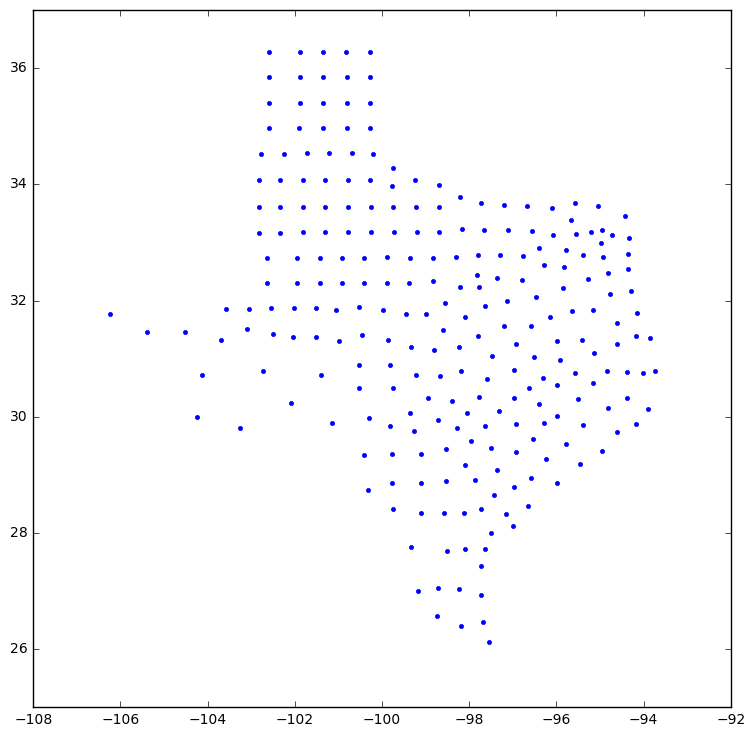

In [69]:
fig = figure(figsize=(9,9))
plt.plot(centroids[:,0], centroids[:,1],'.')
plt.ylim([25,37])
show()

In [70]:
wq.neighbors[0]

[4, 5, 6]

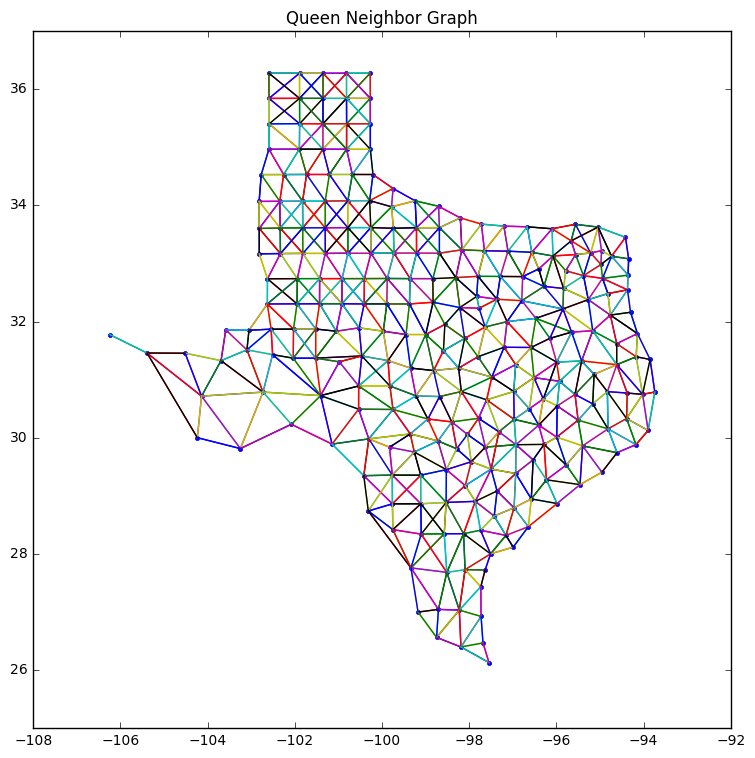

In [71]:
from pylab import figure, scatter, show
fig = figure(figsize=(9,9))

plt.plot(centroids[:,0], centroids[:,1],'.')
#plt.plot(s04[:,0], s04[:,1], '-')
plt.ylim([25,37])
for k,neighs in wq.neighbors.items():
    #print(k,neighs)
    origin = centroids[k]
    for neigh in neighs:
        segment = centroids[[k,neigh]]
        plt.plot(segment[:,0], segment[:,1], '-')
plt.title('Queen Neighbor Graph')
show()

In [72]:
wr = ps.rook_from_shapefile('data/texas.shp')

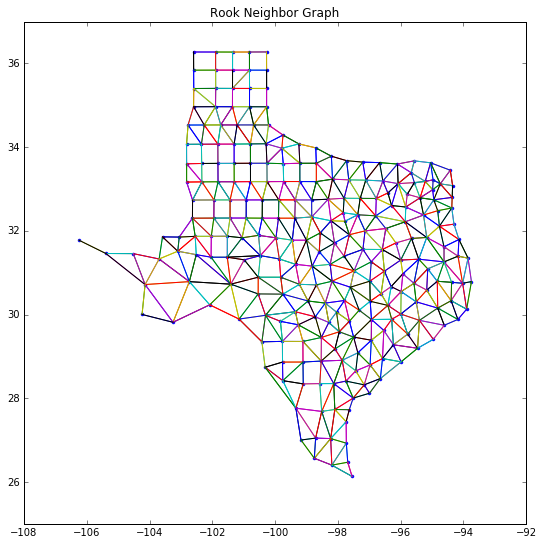

In [137]:
fig = figure(figsize=(9,9))

plt.plot(centroids[:,0], centroids[:,1],'.')
#plt.plot(s04[:,0], s04[:,1], '-')
plt.ylim([25,37])
for k,neighs in wr.neighbors.items():
    #print(k,neighs)
    origin = centroids[k]
    for neigh in neighs:
        segment = centroids[[k,neigh]]
        plt.plot(segment[:,0], segment[:,1], '-')
plt.title('Rook Neighbor Graph')
show()

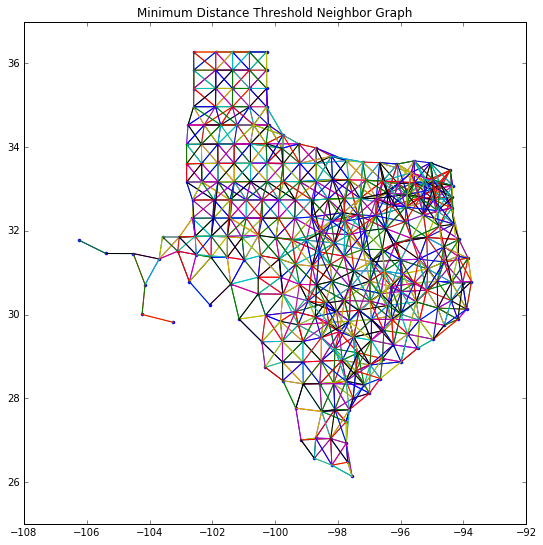

In [138]:
fig = figure(figsize=(9,9))
plt.plot(centroids[:,0], centroids[:,1],'.')
#plt.plot(s04[:,0], s04[:,1], '-')
plt.ylim([25,37])
for k,neighs in Wmind.neighbors.items():
    origin = centroids[k]
    for neigh in neighs:
        segment = centroids[[k,neigh]]
        plt.plot(segment[:,0], segment[:,1], '-')
plt.title('Minimum Distance Threshold Neighbor Graph')
show()

In [67]:
Wmind.pct_nonzero

3.8378076756153514

In [68]:
wr.pct_nonzero

2.0243040486080974

In [69]:
wq.pct_nonzero

2.263004526009052

## Exercise

1. Answer this question before writing any code: What spatial weights structure would be more dense, Texas counties based on rook contiguity or Texas counties based on knn with k=4?
2. Why?
3. Write code to see if you are correct.

## Solution

In [70]:
wrk = ps.rook_from_shapefile("data/texas.shp")

In [71]:
wrk.pct_nonzero

2.0243040486080974

In [73]:
wk4 = ps.knnW_from_shapefile("data/texas.shp", k=4)
wk4.pct_nonzero

1.5748031496062993